# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: www.kaggle.com/jealousleopard/goodreadsbooks

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("books.csv", error_bad_lines=False)

In [2]:
# Getting a quick overview of null values and the data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11190 entries, 0 to 11189
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11190 non-null  int64  
 1   title               11182 non-null  object 
 2   authors             11182 non-null  object 
 3   average_rating      11182 non-null  float64
 4   isbn                11182 non-null  object 
 5   isbn13              11182 non-null  float64
 6   language_code       11182 non-null  object 
 7     num_pages         11182 non-null  float64
 8   ratings_count       11182 non-null  float64
 9   text_reviews_count  11182 non-null  object 
 10  publication_date    11182 non-null  object 
 11  publisher           11182 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

<AxesSubplot:>

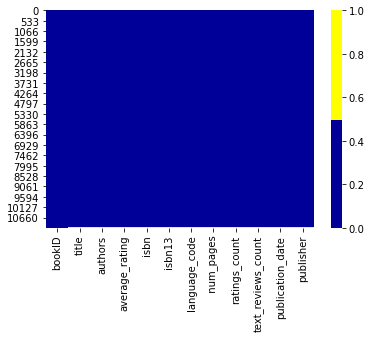

In [3]:
# A heatmap plot of any missing data
cols = df.columns[:12] # all columns
colours = ['#000099', '#ffff00'] # specifying the colours - yellow is not missing. blue is missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [4]:
# Another way of checking the sum of null values in each column
df.isna().sum()

bookID                0
title                 8
authors               8
average_rating        8
isbn                  8
isbn13                8
language_code         8
  num_pages           8
ratings_count         8
text_reviews_count    8
publication_date      8
publisher             8
dtype: int64

^^ **No missing data**
*****

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<AxesSubplot:>

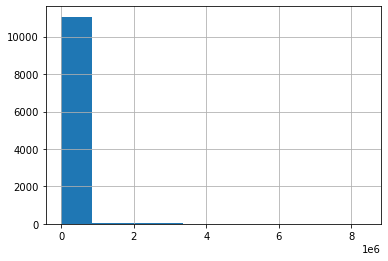

In [5]:
# Histogram of the count of ratings
df['ratings_count'].hist()

<AxesSubplot:>

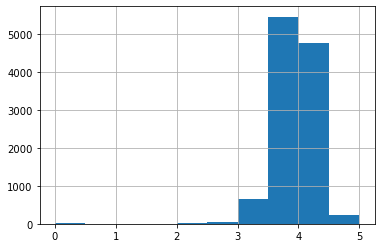

In [6]:
# Want to see the distribution of the average_ratings
df['average_rating'].hist()

<AxesSubplot:>

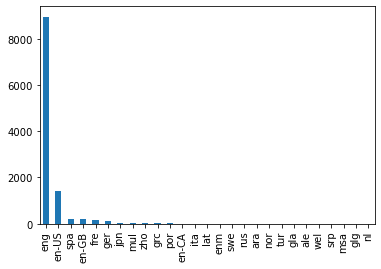

In [7]:
# Seeing the number of books in each language
df['language_code'].value_counts().plot.bar()

^^^ **Outliers wil not affect my analysis in this case so I will not remove them.**
*****

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [8]:
# Checking for duplicates
dup = df[df.duplicated(keep=False)]
dup

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


^^ **No duplicates**
*****

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [9]:
# In my exploratory data analysis, I found that inconsistencies on the author column
# There's both the author name and the illustrator or editor names, seperated by '/'
# I will only keep the first author's name and exclude the rest

df.insert(3, "author_only",'') # inserting new column with just the first author name
df['author_only'] = df['authors'].str.split('/').str[0] # str[0] - 0 index to get the characters from the left
df.iloc[0:3,0:8]

,bookID,title,authors,author_only,average_rating,isbn,isbn13,language_code
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,J.K. Rowling,4.57,439785960,9.780000e+12,eng
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,J.K. Rowling,4.49,439358078,9.780000e+12,eng
2,3,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,J.K. Rowling,4.57,439139600,9.780000e+12,eng


In [10]:
# In my exploratory data analysis, I found that inconsistencies on the publisher column
# On the publisher column there's both 'Scholastic Inc.' and 'Scholastic' which are the same thing

df.iloc[0:4,7:13]

,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,eng,652.0,2807476.0,46750,9/16/06,Scholastic Inc.
1,eng,870.0,2898741.0,50888,9/1/04,Scholastic Inc.
2,eng,734.0,3025822.0,55598,9/28/02,Scholastic
3,eng,352.0,6333.0,244,11/1/03,Scholastic


In [11]:
# Replacing Scholastic Inc. to Scholastic
df.replace(to_replace='Scholastic Inc.', value = 'Scholastic', inplace=True)
df.iloc[0:4,7:13]

,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,eng,652.0,2807476.0,46750,9/16/06,Scholastic
1,eng,870.0,2898741.0,50888,9/1/04,Scholastic
2,eng,734.0,3025822.0,55598,9/28/02,Scholastic
3,eng,352.0,6333.0,244,11/1/03,Scholastic


## New Analysis and Cleaning

In [12]:
df = pd.read_csv("books.csv", error_bad_lines=False) # re-reading csv file
df.insert(3, "author_only",'') # inserting new column with just the first author name
df['author_only'] = df['authors'].str.split('/').str[0]
df.replace(to_replace='Scholastic Inc.', value = 'Scholastic', inplace=True)

df = df[df.ratings_count > 1000]
df = df[df["publisher"].str.contains("Tantor Media")==False]
df = df[df["publisher"].str.contains("Recorded Books")==False]
df = df[df["publisher"].str.contains("audio|Audio")==False]
df = df.sort_values(by=['  num_pages'])
df = df[df['  num_pages'] > 5]
df = df[df["title"].str.contains("vols|Vols")==False]
df = df[df["title"].str.contains("boxed set")==False]
df = df[df["title"].str.contains("Boxed Set")==False]
# df = df[df["title"].str.contains("volumes|Volumes")==False]

df = df.sort_values(by=['  num_pages'])

In [13]:
df['title'] = df['title'].str.replace('Of','of')
df['title'] = df['title'].str.replace('&','and')
df['publisher'] = df['publisher'].str.replace('&','and')
df['publisher'] = df['publisher'].str.replace('And','and')
df['title'] = df['title'].str.replace('And','and')
df['language_code'] = df['language_code'].str.replace('en-US','eng')
df['language_code'] = df['language_code'].str.replace('en-CA','eng')
df['language_code'] = df['language_code'].str.replace('en-GB','eng')
# df['publisher'] = df['publisher'].str.replace('&','and')

In [14]:
# Changing publisher names
df.loc[df['publisher'].str.contains('Scholastic', case=False),'publisher'] = 'Scholastic'
df.loc[df['publisher'].str.contains('Bantam', case=False),'publisher'] = 'Random House' #parent company
df.loc[df['publisher'].str.contains('Dutton', case=False),'publisher'] = 'Dutton'
df.loc[df['publisher'].str.contains('Knopf', case=False),'publisher'] = 'Knopf'
df.loc[df['publisher'].str.contains('Little  Brown', case=False),'publisher'] = 'Little Brown and Company' #spacing
df.loc[df['publisher'].str.contains('Little Brown', case=False),'publisher'] = 'Little Brown and Company'
df.loc[df['publisher'].str.contains('Del Rey', case=False),'publisher'] = 'Del Rey'
df.loc[df['publisher'].str.contains('Pocket', case=False),'publisher'] = 'Simon & Schuster' #parent company
df.loc[df['publisher'].str.contains('Harper', case=False),'publisher'] = 'HarperCollins'
df.loc[df['publisher'].str.contains('Collins', case=False),'publisher'] = 'HarperCollins'
df.loc[df['publisher'].str.contains('Harcourt', case=False),'publisher'] = 'Houghton Mifflin Harcourt'
df.loc[df['publisher'].str.contains('Houghton', case=False),'publisher'] = 'Houghton Mifflin Harcourt'
df.loc[df['publisher'].str.contains('Mifflin', case=False),'publisher'] = 'Houghton Mifflin Harcourt'
df.loc[df['publisher'].str.contains('Wang', case=False),'publisher'] = 'Hill and Wang'
df.loc[df['publisher'].str.contains('Scribner', case=False),'publisher'] = 'Scribner'
df.loc[df['publisher'].str.contains('Random', case=False),'publisher'] = 'Random House'
df.loc[df['publisher'].str.contains('Simon', case=False),'publisher'] = 'Simon & Schuster'
df.loc[df['publisher'].str.contains('Crown', case=False),'publisher'] = 'Crown'
df.loc[df['publisher'].str.contains('Double', case=False),'publisher'] = 'Doubleday'
df.loc[df['publisher'].str.contains('Vintage', case=False),'publisher'] = 'Vintage'

<AxesSubplot:>

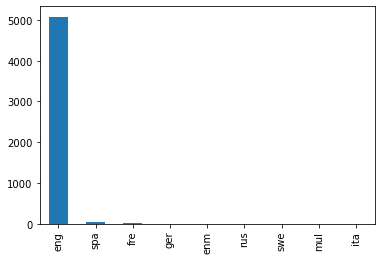

In [15]:
df['language_code'].value_counts().plot.bar()

In [17]:
df.head(2)

,bookID,title,authors,author_only,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6449,24215,Alice's Adventures in Wonderland: A Pop-Up Ada...,Robert Sabuda/Lewis Carroll,Robert Sabuda,4.33,689847432,9.780000e+12,eng,12.0,21875.0,111,10/1/03,Simon & Schuster
1422,4944,The Very Hungry Caterpillar,Eric Carle,Eric Carle,4.29,399226907,9.780000e+12,eng,13.0,3945.0,262,3/23/94,Philomel Books


<br><br><br>
### As I was cleaning the data on here, I realized that many popular books were missing - so I manually entered over a hundred books and updated the rating count and text review counts. I also removed books that had less than a thousand reviews. <br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## Summarize Your Results

Make note of your answers to the following questions.

**1. Did you find all four types of dirty data in your dataset?**<br>No I did not, I only found inconsistenties that needed to be cleaned. Outliers made sense in my data so I did not do anything to it.<br><br>
**2. Did the process of cleaning your data give you new insights into your dataset?**<br>Yes, seeing the histogram distribution of data helped me see the data with a new perspective. <br><br>
**3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?**<br>Currently there's nothing in mind. I would refer back to all my checkpoints to see my process.<br>